# Ultra Marathon Project

### Import Libraries

In [143]:
import pandas as pd
import seaborn as sns

### First Look

In [146]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

/var/folders/by/4dfr5wv56g9c4s2hr4sjrcw00000gn/T/ipykernel_95409/107228863.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [147]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [148]:
df.shape

(7461195, 13)

In [149]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

### Cleaning and Filtering

In [150]:
df.isnull().sum()

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2826524
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64

In [151]:
df['month_year'] = df['Event dates'].str.extract(r'(\d{2}\.\d{4})')
df['month_year'] = '01.' + df['month_year']
df['month_year'] = pd.to_datetime(df['month_year'], format='%d.%m.%Y', errors='coerce')

In [152]:
df.drop(['Event dates'], axis = 1, inplace = True)

In [153]:
dfCountry = df[df['Athlete country'].isin (['CAN', 'USA'])]

In [154]:
latest_event = df['Year of event'].max()
print("Latest event date:", latest_event)

Latest event date: 2022


In [155]:
dfCountry = dfCountry[dfCountry['Year of event'] >= 1922]

In [156]:
dfCountry['Athlete age category'] = dfCountry['Athlete age category'].str.replace(r'\D+','', regex=True)

In [157]:
dfCountry.rename(columns={'Athlete age category': 'Athlete Age'}, inplace=True)

In [158]:
dfCountry['Athlete Age'] = pd.to_numeric(dfCountry['Athlete Age'], errors='coerce').astype('Int64')

In [159]:
dfCountry['Athlete performance'] = dfCountry['Athlete performance'].str.replace(' h', '', regex=False)

In [160]:
dfCountry.drop(['Athlete club','Athlete year of birth'], axis=1, inplace = True)

In [108]:
#dfCountry[(dfCountry['Event distance/length'] == '100mi') & (dfCountry['Athlete country'] == 'USA')]

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete Age,Athlete average speed,Athlete ID,month_year
1036,2018,Extreme North Dakota Sandhills Ultra Run Exper...,100mi,3,30:27:00,USA,M,23,5.285,1034,2018-03-01
1037,2018,Extreme North Dakota Sandhills Ultra Run Exper...,100mi,3,46:24:00,USA,F,45,3.468,1035,2018-03-01
1038,2018,Extreme North Dakota Sandhills Ultra Run Exper...,100mi,3,46:24:00,USA,M,35,3.468,1036,2018-03-01
1362,2018,Antelope Island Buffalo Run 100 Mile (USA),100mi,48,15:58:20,USA,M,45,10.076,1360,2018-03-01
1363,2018,Antelope Island Buffalo Run 100 Mile (USA),100mi,48,17:27:23,USA,M,40,9.219,1361,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...
7460793,1995,Rocky Raccoon 100 Mile Trail Run (USA),100mi,36,28:21:15,USA,M,50,5676.0,322730,1995-02-01
7460794,1995,Rocky Raccoon 100 Mile Trail Run (USA),100mi,36,28:21:16,USA,F,45,5676.0,1046535,1995-02-01
7460795,1995,Rocky Raccoon 100 Mile Trail Run (USA),100mi,36,28:30:34,USA,F,60,5645.0,1046543,1995-02-01
7460796,1995,Rocky Raccoon 100 Mile Trail Run (USA),100mi,36,28:39:10,USA,M,45,5617.0,1070305,1995-02-01


In [46]:
event_array = dfCountry[dfCountry['Event distance/length'].str.contains('km|mi', na=False)]['Event distance/length'].unique()
event_array

array(['50mi', '50km', '28mi', '164km', '30mi', '82km', '55km', '33mi',
       '100mi', '100km', '60mi', '52.9km', '60km', '40mi',
       '196km/4Etappen', '48.2km', '45km', '52.6km', '80km', '65km',
       '51km', '70km', '33.7mi', '51.4mi', '200km', '150km/3Etappen',
       '53km', '40mile', '34mi', '77mi', '42.4mi', '29.3mi', '116mi',
       '101km', '75mi', '59.6km', '76km', '250km', '1000mi', '350mi',
       '54km', '316km/7Etappen', '47km', '64km', '52km', '85km', '71mi',
       '130km/2Etappen', '125km', '111km', '269km', '300km', '28.2mi',
       '52mi', '39mi', '110mi/2Etappen', '236km/6Etappen',
       '155km/6Etappen', '102km', '87km', '62km', '118mi', '75km', '94km',
       '48km', '34.9mi', '135mi', '72km', '45.4km', '108km', '200mi',
       '150mi', '128km', '268mi', '56km', '57km', '66km', '46.5mi',
       '31mi', '51.8km', '52.4mi', '97mi/3Etappen', '106km', '49.2km',
       '46km', '130km', '250km/6Etappen', '84km', '67.5km', '85.5km',
       '92km', '115km', '170km', 

In [161]:
dfCountry = dfCountry[dfCountry['Event distance/length'].isin(['50km','50mi'])]

In [162]:
dfCountry['Event distance/length'] = (dfCountry['Event distance/length'].str.strip().str.lower().str.replace(' ', '', regex=False))

In [163]:
dfCountry

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete Age,Athlete average speed,Athlete ID,month_year
55,2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05,USA,M,23,8.141,55,2018-01-01
56,2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35,CAN,F,40,7.211,56,2018-01-01
57,2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00,CAN,M,40,6.967,57,2018-01-01
58,2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17,USA,M,23,6.914,58,2018-01-01
59,2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35,USA,M,23,6.738,59,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37,USA,M,50,6709.0,1045603,1995-01-01
7461182,1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41,USA,M,60,6690.0,1070463,1995-01-01
7461183,1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26,USA,F,60,6674.0,416139,1995-01-01
7461184,1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26,USA,F,40,6674.0,1098098,1995-01-01


In [164]:
dfCountry.dtypes

Year of event                         int64
Event name                           object
Event distance/length                object
Event number of finishers             int64
Athlete performance                  object
Athlete country                      object
Athlete gender                       object
Athlete Age                           Int64
Athlete average speed                object
Athlete ID                            int64
month_year                   datetime64[ns]
dtype: object

In [165]:
dfCountry.isnull().sum()

Year of event                    0
Event name                       0
Event distance/length            0
Event number of finishers        0
Athlete performance              0
Athlete country                  0
Athlete gender                   0
Athlete Age                  22781
Athlete average speed            0
Athlete ID                       0
month_year                       6
dtype: int64

In [166]:
mask = dfCountry['Athlete average speed'].str.match(r'^\d{2}:\d{2}:\d{2}$', na=False)
count = mask.sum()
print(f"Rows in hh:mm:ss format: {count}")

Rows in hh:mm:ss format: 46


In [167]:
dfCountry = dfCountry[~mask]

In [168]:
dfCountry['Athlete average speed'] = dfCountry['Athlete average speed'].astype(float)

/var/folders/by/4dfr5wv56g9c4s2hr4sjrcw00000gn/T/ipykernel_95409/3526020324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCountry['Athlete average speed'] = dfCountry['Athlete average speed'].astype(float)


In [169]:
dfCountry['Athlete performance'] = pd.to_timedelta(dfCountry['Athlete performance'])

/var/folders/by/4dfr5wv56g9c4s2hr4sjrcw00000gn/T/ipykernel_95409/4174878165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCountry['Athlete performance'] = pd.to_timedelta(dfCountry['Athlete performance'])


In [170]:
dfCountry = dfCountry.dropna(subset=['Athlete Age'])

In [171]:
dfCountry[['Year of event', 'Event distance/length', 'Athlete average speed',
            'Athlete gender', 'Athlete Age', 'Athlete country']].isnull().sum()


Year of event            0
Event distance/length    0
Athlete average speed    0
Athlete gender           0
Athlete Age              0
Athlete country          0
dtype: int64

In [172]:
dfCountry['Athlete country'].value_counts()

Athlete country
USA    899191
CAN     54042
Name: count, dtype: int64

In [173]:
dfCountry[['Athlete average speed', 'Athlete Age']].dtypes

Athlete average speed    float64
Athlete Age                Int64
dtype: object

In [174]:
dfCountry['Year of event'].min()

1932

In [175]:
dfCountry.sample(5)

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete Age,Athlete average speed,Athlete ID,month_year
4509986,2007,Scorched Sole Ultra 50 km (CAN),50km,29,0 days 07:04:36,CAN,M,60,7.065,180717,2007-06-01
893317,2016,Pineland Farms 50 Mile Trail Running (USA),50mi,127,0 days 08:10:15,USA,M,50,9.848,182313,2016-05-01
2994490,2021,Rocky Brunch Rivermen 50km Ultra Race (USA),50km,18,0 days 08:38:05,USA,M,40,5.791,474522,2021-08-01
5231079,2011,Cumberland Trail 50k (USA),50km,43,0 days 08:31:25,USA,F,50,5.866,12003,2011-10-01
6511320,2015,Quicksilver 50 km Endurance Run (USA),50km,154,0 days 08:18:37,USA,F,35,6.017,1251987,2015-05-01


/var/folders/by/4dfr5wv56g9c4s2hr4sjrcw00000gn/T/ipykernel_95409/2352266082.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfCountry, x='Year of event', palette='viridis')


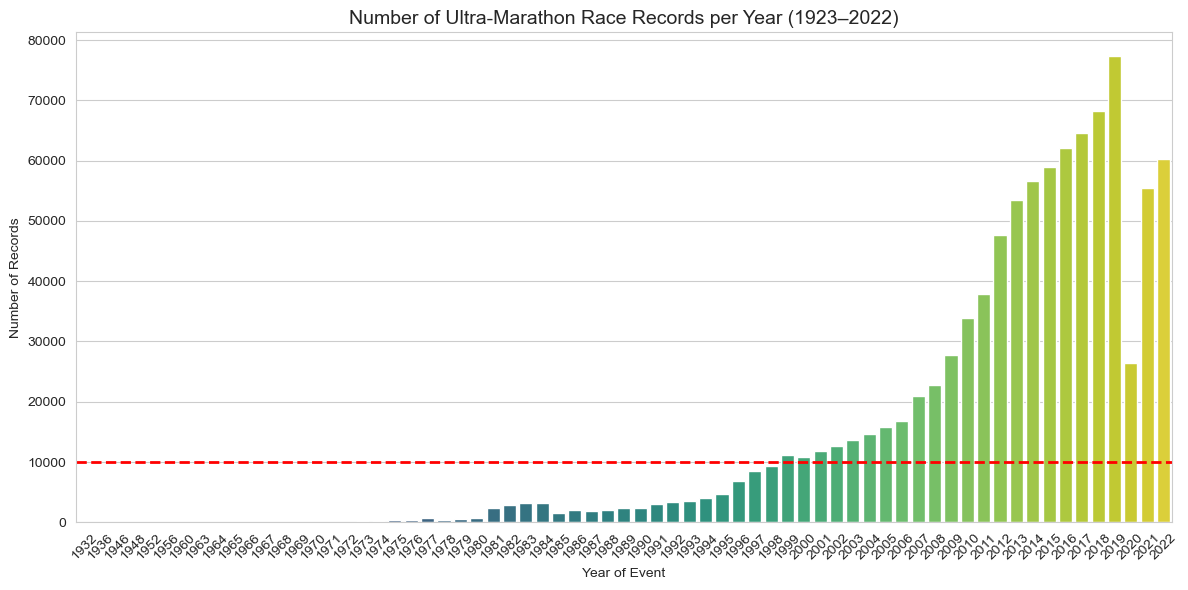

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.countplot(data=dfCountry, x='Year of event', palette='viridis')
plt.axhline(y=10000, color='red', linestyle='--', linewidth=2, label='Threshold')
plt.title('Number of Ultra-Marathon Race Records per Year (1923–2022)', fontsize=14)
plt.xlabel('Year of Event')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [177]:
dfCountry = dfCountry[dfCountry['Year of event']>= 1999]

In [178]:
dfCountry.reset_index(drop=True, inplace=True)

/var/folders/by/4dfr5wv56g9c4s2hr4sjrcw00000gn/T/ipykernel_95409/2421520893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfCountry, x='Year of event', palette='viridis')


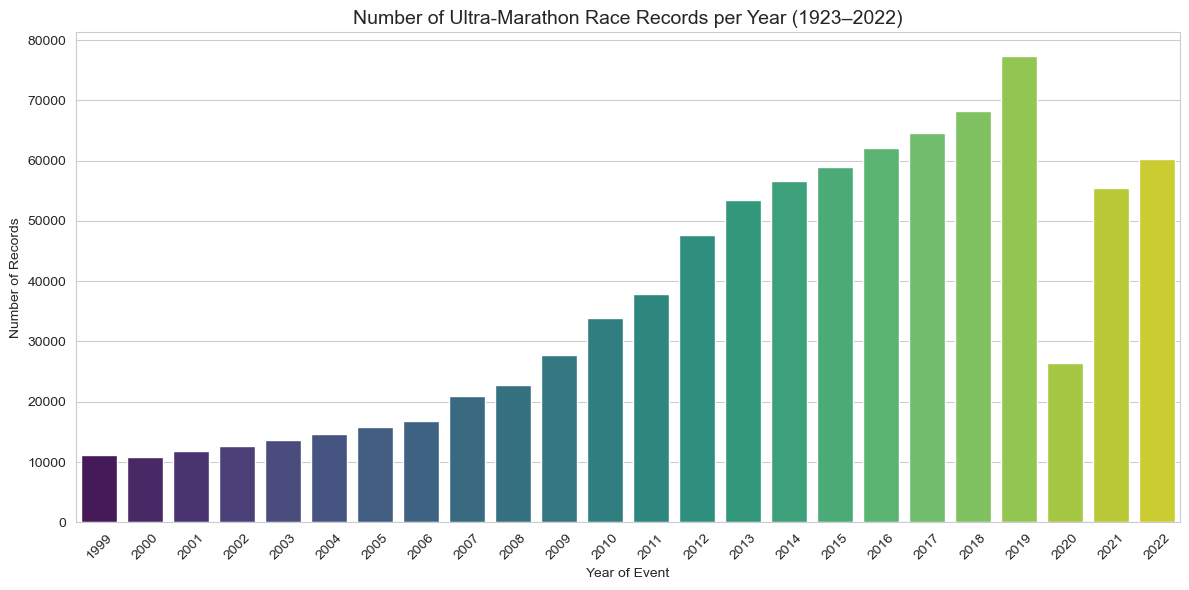

In [179]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.countplot(data=dfCountry, x='Year of event', palette='viridis')
plt.title('Number of Ultra-Marathon Race Records per Year (1923–2022)', fontsize=14)
plt.xlabel('Year of Event')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [180]:
dfCountry.to_csv('ultra_northamerica_classic.csv', index=False)